## Librairies

In [25]:
import tensorflow as tf
print(tf.__version__)  # Cela devrait afficher 2.14.1


2.18.0


In [26]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
from scipy.io import loadmat
import tensorflow as tf
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

## Données

In [27]:
file_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/file_list.mat')
file_lists = file_list['file_list']
annotation_list = file_list['annotation_list']
labels = file_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_lists]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_file_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_file_list.head()

,Image Path,Annotation,Label
0,n02085620-Chihuahua/n02085620_10074.jpg,n02085620-Chihuahua/n02085620_10074,1
1,n02085620-Chihuahua/n02085620_10131.jpg,n02085620-Chihuahua/n02085620_10131,1
2,n02085620-Chihuahua/n02085620_10621.jpg,n02085620-Chihuahua/n02085620_10621,1
3,n02085620-Chihuahua/n02085620_1073.jpg,n02085620-Chihuahua/n02085620_1073,1
4,n02085620-Chihuahua/n02085620_10976.jpg,n02085620-Chihuahua/n02085620_10976,1


In [28]:
df_file_list.shape

(20580, 3)

In [29]:
train_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/train_list.mat')
file_list = train_list['file_list']
annotation_list = train_list['annotation_list']
labels = train_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_train_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_train_list.head()

,Image Path,Annotation,Label
0,n02085620-Chihuahua/n02085620_5927.jpg,n02085620-Chihuahua/n02085620_5927,1
1,n02085620-Chihuahua/n02085620_4441.jpg,n02085620-Chihuahua/n02085620_4441,1
2,n02085620-Chihuahua/n02085620_1502.jpg,n02085620-Chihuahua/n02085620_1502,1
3,n02085620-Chihuahua/n02085620_1916.jpg,n02085620-Chihuahua/n02085620_1916,1
4,n02085620-Chihuahua/n02085620_13151.jpg,n02085620-Chihuahua/n02085620_13151,1


In [30]:
df_train_list.shape

(12000, 3)

In [31]:
train_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/train_data.mat')
train_info = train_data['train_info']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in train_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in train_info['annotation_list'][0][0]]
labels = [label[0] for label in train_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in train_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_train_data = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Afficher le DataFrame
df_train_data.head()

,Image Path,Annotation,Label,FG ID
0,n02085620-Chihuahua/n02085620_5927.jpg,n02085620-Chihuahua/n02085620_5927,1,histograms_spm/n02085620-Chihuahua/n02085620_5...
1,n02085620-Chihuahua/n02085620_4441.jpg,n02085620-Chihuahua/n02085620_4441,1,histograms_spm/n02085620-Chihuahua/n02085620_4...
2,n02085620-Chihuahua/n02085620_1502.jpg,n02085620-Chihuahua/n02085620_1502,1,histograms_spm/n02085620-Chihuahua/n02085620_1...
3,n02085620-Chihuahua/n02085620_1916.jpg,n02085620-Chihuahua/n02085620_1916,1,histograms_spm/n02085620-Chihuahua/n02085620_1...
4,n02085620-Chihuahua/n02085620_13151.jpg,n02085620-Chihuahua/n02085620_13151,1,histograms_spm/n02085620-Chihuahua/n02085620_1...


In [32]:
df_train_data.shape

(12000, 4)

In [33]:
test_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/test_list.mat')
file_list = test_list['file_list']
annotation_list = test_list['annotation_list']
labels = test_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_test_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_test_list.head()

,Image Path,Annotation,Label
0,n02085620-Chihuahua/n02085620_2650.jpg,n02085620-Chihuahua/n02085620_2650,1
1,n02085620-Chihuahua/n02085620_4919.jpg,n02085620-Chihuahua/n02085620_4919,1
2,n02085620-Chihuahua/n02085620_1765.jpg,n02085620-Chihuahua/n02085620_1765,1
3,n02085620-Chihuahua/n02085620_3006.jpg,n02085620-Chihuahua/n02085620_3006,1
4,n02085620-Chihuahua/n02085620_1492.jpg,n02085620-Chihuahua/n02085620_1492,1


In [34]:
df_test_list.shape

(8580, 3)

In [35]:
test_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/test_data.mat')
test_info = test_data['test_info']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in test_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in test_info['annotation_list'][0][0]]
labels = [label[0] for label in test_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in test_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_test_info = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Affichage du DataFrame
df_test_info.head()

,Image Path,Annotation,Label,FG ID
0,n02085620-Chihuahua/n02085620_2650.jpg,n02085620-Chihuahua/n02085620_2650,1,histograms_spm/n02085620-Chihuahua/n02085620_2...
1,n02085620-Chihuahua/n02085620_4919.jpg,n02085620-Chihuahua/n02085620_4919,1,histograms_spm/n02085620-Chihuahua/n02085620_4...
2,n02085620-Chihuahua/n02085620_1765.jpg,n02085620-Chihuahua/n02085620_1765,1,histograms_spm/n02085620-Chihuahua/n02085620_1...
3,n02085620-Chihuahua/n02085620_3006.jpg,n02085620-Chihuahua/n02085620_3006,1,histograms_spm/n02085620-Chihuahua/n02085620_3...
4,n02085620-Chihuahua/n02085620_1492.jpg,n02085620-Chihuahua/n02085620_1492,1,histograms_spm/n02085620-Chihuahua/n02085620_1...


In [36]:
df_test_info.shape

(8580, 4)

In [37]:
base_dir = '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images_complet/'  # Le répertoire contenant les images

# Parcourir les chemins des images et les charger
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    image = Image.open(full_path)
    #image.show()  # Afficher l'image

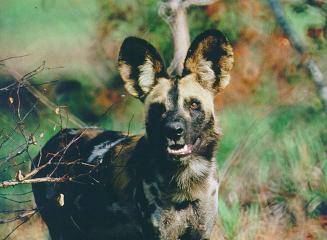

In [38]:
image

## Preprocessing des images

### Blanchiment des images (Whitening)

In [39]:
base_dir = '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images_complet/'  # Le répertoire contenant les images

# Chargez une image en tant que tenseur
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    image = tf.io.read_file(full_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

# Appliquez le blanchiment
image_whitened = tf.image.per_image_standardization(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.096483..3.0718777].


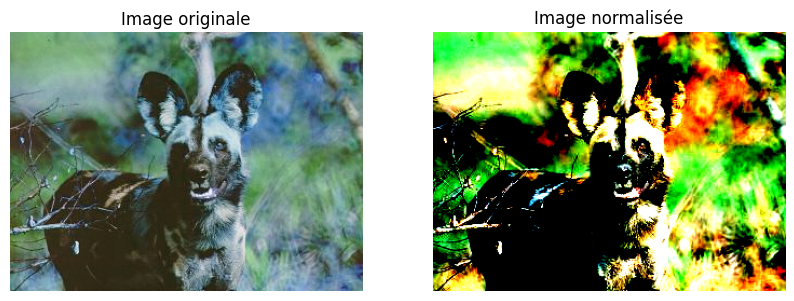

In [50]:
# Afficher l'image originale et l'image normalisée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image normalisée')
plt.imshow(image_whitened, cmap='gray')
plt.axis('off')

plt.show()

In [41]:
image_whitened

<tf.Tensor: shape=(240, 327, 3), dtype=float32, numpy=
array([[[ 0.33568683,  1.1261419 ,  0.21407834],
        [ 0.33568683,  1.1261419 ,  0.21407834],
        [ 0.33568683,  1.1261419 ,  0.21407834],
        ...,
        [ 0.43702722,  0.4572953 , -0.17101534],
        [ 0.41675913,  0.61943996, -0.06967478],
        [ 0.5383676 ,  0.8221207 ,  0.11273794]],

       [[ 0.29515067,  1.0856057 ,  0.17354219],
        [ 0.29515067,  1.0856057 ,  0.17354219],
        [ 0.31541875,  1.1058738 ,  0.19381025],
        ...,
        [ 0.6599761 ,  0.7207803 ,  0.09246986],
        [ 0.6802442 ,  0.882925  ,  0.19381025],
        [ 0.5586357 ,  0.882925  ,  0.1532741 ]],

       [[ 0.2546145 ,  1.0450696 ,  0.13300602],
        [ 0.27488258,  1.0653377 ,  0.1532741 ],
        [ 0.2546145 ,  1.1058738 ,  0.17354219],
        ...,
        [ 0.1532741 ,  0.2546145 , -0.35342807],
        [ 0.33568683,  0.61943996, -0.0494067 ],
        [ 0.31541875,  0.7207803 ,  0.01139754]],

       ...,

     

### Égalisation de l'histogramme

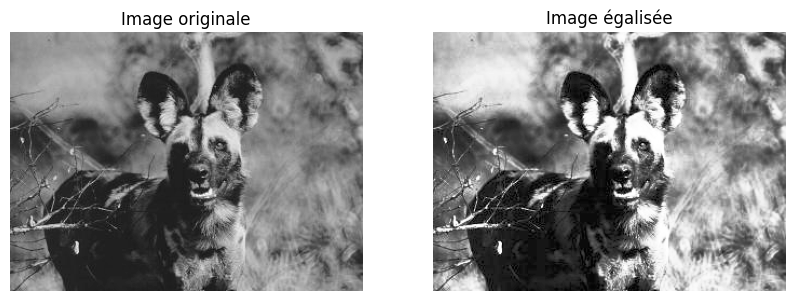

In [42]:
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)# Charger l'image avec Pillow et la convertir en niveaux de gris
    # Charger l'image en niveaux de gris
    img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    # Égaliser l'histogramme
    img_equalized = cv2.equalizeHist(img)

# Afficher l'image originale et l'image égalisée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image égalisée')
plt.imshow(img_equalized, cmap='gray')
plt.axis('off')

plt.show()

### Redimensionnement des images

In [43]:
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    # Chargez l'image
    image = cv2.imread(full_path)

    # Redimensionnez l'image
    resized_image = cv2.resize(image, (224, 224))

    # Sauvegarder l'image redimensionnée
    cv2.imwrite('image_resized.jpg', resized_image)

In [ ]:
# Afficher l'image originale et l'image redimensionnée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image redimensionnée')
plt.imshow(image_whitened, cmap='gray')
plt.axis('off')

plt.show()

In [44]:
resized_image

array([[[115, 159, 122],
        [114, 159, 121],
        [114, 159, 120],
        ...,
        [ 97, 123, 134],
        [ 97, 128, 127],
        [108, 142, 130]],

       [[113, 157, 120],
        [113, 158, 119],
        [114, 159, 120],
        ...,
        [ 92, 119, 127],
        [109, 138, 136],
        [112, 145, 132]],

       [[111, 156, 117],
        [112, 157, 118],
        [113, 159, 119],
        ...,
        [ 63,  89,  93],
        [ 89, 117, 111],
        [102, 134, 118]],

       ...,

       [[ 87, 133, 133],
        [ 99, 142, 142],
        [111, 151, 150],
        ...,
        [100, 137, 142],
        [101, 139, 144],
        [ 96, 133, 138]],

       [[ 90, 134, 133],
        [ 85, 129, 126],
        [100, 140, 138],
        ...,
        [104, 144, 146],
        [107, 148, 151],
        [ 99, 141, 145]],

       [[ 78, 123, 120],
        [ 64, 106, 104],
        [ 34,  73,  71],
        ...,
        [108, 149, 151],
        [114, 157, 160],
        [106, 150, 154]]

### Mirroring (Symétrie)

In [51]:
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    # Chargez l'image
    image = cv2.imread(full_path)

    # Appliquez une symétrie horizontale
    flipped_image = cv2.flip(image, 1)

    # Sauvegardez l'image mirroirée
    cv2.imwrite('image_flipped.jpg', flipped_image)

In [ ]:
# Afficher l'image originale et l'image mirroirée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image mirroirée')
plt.imshow(image_whitened, cmap='gray')
plt.axis('off')

plt.show()

### Cropping (Recadrage)

In [47]:
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    # Chargez l'image
    image = cv2.imread(full_path)

    # Recadrage (crop) - prenez une partie de l'image
    cropped_image = image[50:200, 50:200]

    # Sauvegarder l'image recadrée
    cv2.imwrite('image_cropped.jpg', cropped_image)

In [ ]:
# Afficher l'image originale et l'image recadrée
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image recadrée')
plt.imshow(image_whitened, cmap='gray')
plt.axis('off')

plt.show()

In [1]:
# Images à afficher